In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_merger=pd.read_csv('D:/COSMOS 2015 cataloge/003/运行结果/merger.csv')
data_all=pd.read_csv('D:/COSMOS 2015 cataloge/003/003_catalog_search_results.csv')

In [5]:
data_all

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,class,mass_med_min68,mass_med_max68,mass_best,sfr_med_min68,sfr_med_max68,sfr_best,ssfr_med_min68,ssfr_med_max68,ssfr_best
0,150.012660,2.128643,543615,25201.66211,20105.14844,24.27,0.044,0,0.765,0.734,...,1,8.715,8.861,8.797,-0.783,-0.063,-0.772,-9.609,-8.813,-9.569
1,149.983193,2.128467,543616,25908.38867,20100.97852,24.73,0.084,0,1.079,1.035,...,1,8.684,8.917,8.860,0.018,0.300,0.194,-8.867,-8.370,-8.666
2,150.242883,2.128197,543617,19680.09570,20094.50586,23.94,0.032,0,0.327,0.294,...,0,8.204,8.290,8.314,-3.525,-2.635,-3.410,-11.726,-10.834,-11.723
3,150.269347,2.124711,541650,19045.39844,20010.90039,23.18,0.033,0,0.762,0.751,...,1,9.038,9.145,9.080,0.340,0.499,0.414,-8.758,-8.557,-8.666
4,149.801552,2.115557,537806,30264.89844,19791.76758,20.89,0.008,0,0.353,0.345,...,1,9.608,9.683,9.653,0.436,0.713,0.475,-9.246,-8.887,-9.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23508,149.850710,2.205576,595325,29085.48633,21952.03906,24.00,0.046,0,1.075,1.054,...,1,9.142,9.293,9.223,0.514,0.909,0.623,-8.744,-8.220,-8.600
23509,149.918998,2.206065,595422,27447.76172,21963.51172,24.94,0.071,0,2.209,2.101,...,1,9.405,9.594,9.581,0.952,1.171,1.013,-8.593,-8.308,-8.568
23510,149.773211,2.205793,595820,30944.15039,21957.61523,23.47,0.019,0,0.630,0.623,...,1,8.956,9.188,8.993,0.406,0.862,0.816,-8.777,-8.101,-8.176
23511,149.852923,2.204509,595821,29032.42969,21926.41797,22.95,0.025,0,0.929,0.916,...,1,10.281,10.390,10.400,0.593,1.142,0.675,-9.718,-9.160,-9.725


In [6]:
data_merger

,0,1
0,150.016176,2.121825
1,150.125467,2.111022
2,150.195499,2.103153
3,150.207658,2.216571
4,150.218469,2.237375
...,...,...
2133,150.150569,2.057084
2134,149.914723,2.344669
2135,150.083303,2.050271
2136,150.086963,2.083517


In [38]:
# 将识别的结果组合到总的结果中
index=[]
all_ra,all_dec=list(data_all['ra']),list(data_all['dec'])
merger_ra,merger_dec=list(data_merger['0']),list(data_merger['1'])
for i in range(0,len(all_ra)):
        if all_ra[i] in merger_ra and all_dec[i] in merger_dec:
            index.append(1)
        else:
            index.append(0)
print(len(data_all)==len(index))    # 若True,则合并无误

data_all['merger']=index # 进行合并

# data_all.to_csv('D:/COSMOS 2015 cataloge/003/运行结果/data_all_marked',index=False)

True


In [41]:
merger_index=(data_all['merger']==1)
no_merger_index=(data_all['merger']==0)

In [42]:
data_all

,ra,dec,id,x_image,y_image,flux_814w,fluxerr_814w,type,zpdf,zpdf_l68,...,mass_med_min68,mass_med_max68,mass_best,sfr_med_min68,sfr_med_max68,sfr_best,ssfr_med_min68,ssfr_med_max68,ssfr_best,merger
0,150.012660,2.128643,543615,25201.66211,20105.14844,24.27,0.044,0,0.765,0.734,...,8.715,8.861,8.797,-0.783,-0.063,-0.772,-9.609,-8.813,-9.569,0
1,149.983193,2.128467,543616,25908.38867,20100.97852,24.73,0.084,0,1.079,1.035,...,8.684,8.917,8.860,0.018,0.300,0.194,-8.867,-8.370,-8.666,0
2,150.242883,2.128197,543617,19680.09570,20094.50586,23.94,0.032,0,0.327,0.294,...,8.204,8.290,8.314,-3.525,-2.635,-3.410,-11.726,-10.834,-11.723,0
3,150.269347,2.124711,541650,19045.39844,20010.90039,23.18,0.033,0,0.762,0.751,...,9.038,9.145,9.080,0.340,0.499,0.414,-8.758,-8.557,-8.666,0
4,149.801552,2.115557,537806,30264.89844,19791.76758,20.89,0.008,0,0.353,0.345,...,9.608,9.683,9.653,0.436,0.713,0.475,-9.246,-8.887,-9.178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23508,149.850710,2.205576,595325,29085.48633,21952.03906,24.00,0.046,0,1.075,1.054,...,9.142,9.293,9.223,0.514,0.909,0.623,-8.744,-8.220,-8.600,0
23509,149.918998,2.206065,595422,27447.76172,21963.51172,24.94,0.071,0,2.209,2.101,...,9.405,9.594,9.581,0.952,1.171,1.013,-8.593,-8.308,-8.568,1
23510,149.773211,2.205793,595820,30944.15039,21957.61523,23.47,0.019,0,0.630,0.623,...,8.956,9.188,8.993,0.406,0.862,0.816,-8.777,-8.101,-8.176,0
23511,149.852923,2.204509,595821,29032.42969,21926.41797,22.95,0.025,0,0.929,0.916,...,10.281,10.390,10.400,0.593,1.142,0.675,-9.718,-9.160,-9.725,0


Text(0, 0.5, 'ra')

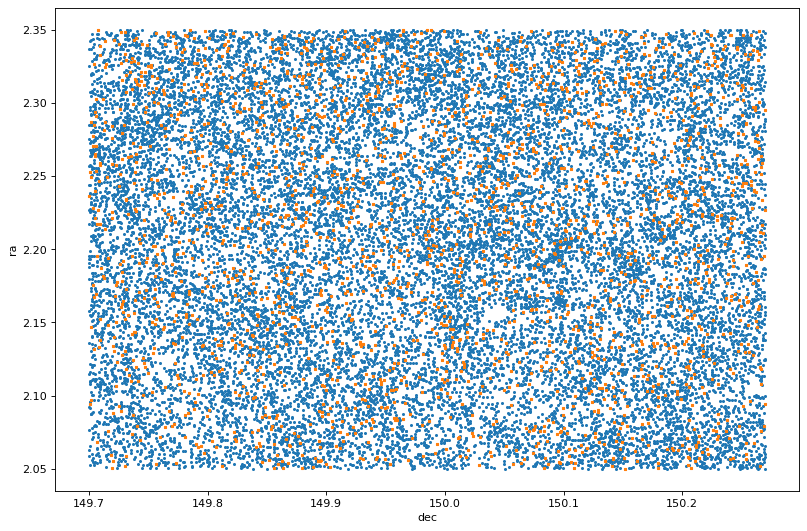

In [50]:
fig = plt.figure(figsize=(12,8),dpi=80)
plt.scatter(data_all[no_merger_index]['ra'],data_all[no_merger_index]['dec'],s=3)
plt.scatter(data_all[merger_index]['ra'],data_all[merger_index]['dec'],s=5,marker='s')
plt.xlabel('dec')
plt.ylabel('ra')

#### 定义,计算 $f(D,R)=e^{D-R}$

In [51]:
def distance(ra1,dec1,ra2,dec2):
    return (np.arccos(np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2))) * 3600  #output:arcsec

In [54]:
# 计算观测数据近邻数

import time
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

t_1=time.time()

lim=0.0033333333333     # 矩形采样天区阈值，S=12 arcsec * 12 arcsec
count=0
P=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]  # 天球投影距离阈值，arcsec
dis_list=list(-99*np.ones((1,len(data_all['ra']))))
dis_list__=[]

for p in P:
    for ra1,dec1 in zip(data_all['ra'],data_all['dec']):
        for ra2,dec2 in zip(data_all['ra'],data_all['dec']):  # 此循环用于计算单个点的近邻计数count
            if (ra1+lim > ra2 > ra1-lim) and (dec1+lim > dec2 > dec1-lim):
                if distance(ra1,dec1,ra2,dec2)<=p:
                    count+=1
        if count>0:
            dis_list__.append(count-1)   # 固定阈值时，近邻数的列表
            count=0
        else:
            dis_list__.append(count)
            count=0
    print(p)
    dis_list=np.vstack((dis_list,dis_list__))
    dis_list__=[]

t_2=time.time()
print('time:{:.2f} min'.format((t_2-t_1)/60))

stastic = pd.DataFrame(np.array(dis_list)).to_csv('D:/COSMOS 2015 cataloge/003/stastic.csv')
stastic

1
1.5
2
2.5
3
3.5
4
4.5
5
7
9
11
time:101.96 min


In [56]:
ra_max = (data_all['ra'].max())
dec_max = (data_all['dec'].max())
ra_min = data_all['ra'].min()
dec_min = data_all['dec'].min()

np.random.seed(100)
ra_random_0 = np.random.uniform(ra_min, ra_max, (len(data_all['ra'])))
dec_random_0 = np.random.uniform(dec_min, dec_max, (len(data_all['ra'])))

warnings.filterwarnings("ignore")

# data_result_ra = data_result['ra']
# data_result_dec = data_result['dec']

t_1=time.time()

lim=0.0033333333333     # 矩形采样天区阈值，S=12 arcsec * 12 arcsec
count=0
P=[1,1.5,2,2.5,3,3.5,4,4.5,5,7,9,11]  # 天球投影距离阈值，arcsec
dis_list=list(-99*np.ones((1,len(data_all['ra']))))
dis_list__=[]

for p in P:
    for ra1,dec1 in zip(data_all['ra'],data_all['dec']):
        for ra2,dec2 in zip(ra_random_0,dec_random_0):  # 此循环用于计算单个点的近邻计数count
            if (ra1+lim > ra2 > ra1-lim) and (dec1+lim > dec2 > dec1-lim):
                if distance(ra1,dec1,ra2,dec2)<=p:
                    count+=1
        if count>0:
            dis_list__.append(count-1)   # 固定阈值时，近邻数的列表
            count=0
        else:
            dis_list__.append(count)
            count=0
    print(p)
    dis_list=np.vstack((dis_list,dis_list__))
    dis_list__=[]

t_2=time.time()
print('time:{:.2f} min'.format((t_2-t_1)/60))

stastic_random = pd.DataFrame(np.array(dis_list)).to_csv('D:/COSMOS 2015 cataloge/003/stastic_random.csv')

1
1.5
2
2.5
3
3.5
4
4.5
5
7
9
11
time:91.71 min
